**Initialization and Setup**

In [83]:
import sqlite3
import pandas as pd

pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics

conn=sqlite3.connect('data/database.sqlite')
cur=conn.cursor()

**Load tables from database**

In [21]:
country = pd.read_sql_query('SELECT * from Country;',conn)
league = pd.read_sql_query('SELECT * from League;',conn)
match = pd.read_sql_query('SELECT * from Match;',conn)
player=pd.read_sql_query('SELECT * from Player;',conn)
player_atr=pd.read_sql_query('SELECT * from Player_Attributes;',conn)
team=pd.read_sql_query('SELECT * from Team;',conn)
team_atr=pd.read_sql_query('SELECT * from Team_Attributes;',conn)

In [22]:
country['league']=league['name']
country

id         name                    league
0       1      Belgium    Belgium Jupiler League
1    1729      England    England Premier League
2    4769       France            France Ligue 1
3    7809      Germany     Germany 1. Bundesliga
4   10257        Italy             Italy Serie A
5   13274  Netherlands    Netherlands Eredivisie
6   15722       Poland        Poland Ekstraklasa
7   17642     Portugal  Portugal Liga ZON Sagres
8   19694     Scotland   Scotland Premier League
9   21518        Spain           Spain LIGA BBVA
10  24558  Switzerland  Switzerland Super League

**Exploring features in team attributes**

In [66]:
team_atr_avg=(team_atr.merge(team[['team_api_id','team_short_name']],on='team_api_id')
         .groupby(['team_short_name'])
         .mean()
         .reset_index()
         .drop(['id'],axis=1))
team_atr_corr=team_atr_avg[['buildUpPlaySpeed','buildUpPlayDribbling',
'buildUpPlayPassing','chanceCreationPassing','chanceCreationCrossing',
'chanceCreationShooting','defencePressure','defenceAggression','defenceTeamWidth']].corr()
team_atr_corr

buildUpPlaySpeed  buildUpPlayDribbling  \
buildUpPlaySpeed                1.000000              0.039350   
buildUpPlayDribbling            0.039350              1.000000   
buildUpPlayPassing              0.400402             -0.148501   
chanceCreationPassing           0.404021              0.134241   
chanceCreationCrossing          0.258955             -0.027094   
chanceCreationShooting          0.051592              0.103016   
defencePressure                -0.136215              0.021909   
defenceAggression               0.108128             -0.044845   
defenceTeamWidth               -0.000701              0.049484   

                        buildUpPlayPassing  chanceCreationPassing  \
buildUpPlaySpeed                  0.400402               0.404021   
buildUpPlayDribbling             -0.148501               0.134241   
buildUpPlayPassing                1.000000               0.196708   
chanceCreationPassing             0.196708               1.000000   
chanceCreationCrossing            0.298143               0.297156   
chanceCreationShooting           -0.106354               0.135995   
defencePressure                  -0.185212               0.173359   
defenceAggression                 0.132623               0.104290   
defenceTeamWidth                  0.030549               0.108622   

                        chanceCreationCrossing  chanceCreationShooting  \
buildUpPlaySpeed                      0.258955                0.051592   
buildUpPlayDribbling                 -0.027094                0.103016   
buildUpPlayPassing                    0.298143               -0.106354   
chanceCreationPassing                 0.297156                0.135995   
chanceCreationCrossing                1.000000               -0.050526   
chanceCreationShooting               -0.050526                1.000000   
defencePressure                       0.032120                0.303604   
defenceAggression                     0.021902                0.203194   
defenceTeamWidth                      0.123586                0.234375   

                        defencePressure  defenceAggression  defenceTeamWidth  
buildUpPlaySpeed              -0.136215           0.108128         -0.000701  
buildUpPlayDribbling           0.021909          -0.044845          0.049484  
buildUpPlayPassing            -0.185212           0.132623          0.030549  
chanceCreationPassing          0.173359           0.104290          0.108622  
chanceCreationCrossing         0.032120           0.021902          0.123586  
chanceCreationShooting         0.303604           0.203194          0.234375  
defencePressure                1.000000           0.434691          0.551449  
defenceAggression              0.434691           1.000000          0.301889  
defenceTeamWidth               0.551449           0.301889          1.000000

Text(0.5, 1, 'Correlation Heatmap of team attributes')

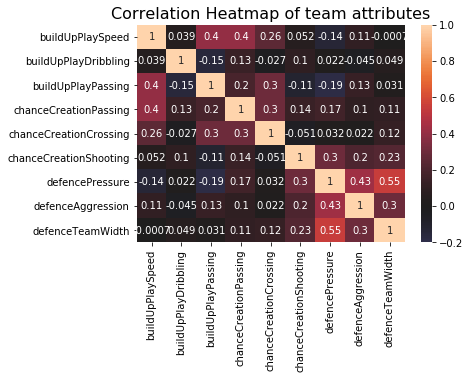

In [466]:
import seaborn as sns
ax=sns.heatmap(team_atr_corr,vmin=-0.2,vmax=1,center=0,annot=True)
ax.set_title('Correlation Heatmap of team attributes',size=16)

**Expoloring player data**

In [280]:
player.head()

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154

In [187]:
player_info=player_atr.merge(player[['player_api_id','player_name','birthday','height','weight']],
                             on='player_api_id')
# player_info=player_info.groupby(['player_name']).mean().reset_index()

In [442]:
player_avg=(player_info.groupby(['player_name'])
                       .mean()
                       .reset_index())
player_atr_corr=player_avg[['overall_rating','potential','crossing', 'finishing', 'heading_accuracy',
                               'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
                               'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
                               'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
                               'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
                               'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
                               'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
                               'gk_reflexes','height','weight']].corr()


In [440]:
player_avg[['overall_rating','potential','crossing', 'finishing', 'heading_accuracy',
                               'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
                               'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
                               'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
                               'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
                               'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
                               'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
                               'gk_reflexes']].describe()

overall_rating     potential      crossing     finishing  \
count    10848.000000  10848.000000  10848.000000  10848.000000   
mean        66.797845     72.080306     52.906043     47.880555   
std          6.226819      5.792544     16.048506     18.022672   
min         43.000000     51.000000      6.000000      5.000000   
25%         62.800000     68.000000     43.586525     32.594737   
50%         66.705882     72.000000     56.333333     49.904545   
75%         70.916667     76.000000     64.652174     63.000000   
max         92.192308     95.230769     89.357143     92.230769   

       heading_accuracy  short_passing       volleys     dribbling  \
count      10848.000000   10848.000000  10390.000000  10848.000000   
mean          56.136268      60.415425     47.156073     56.922923   
std           15.546086      13.411948     17.254666     16.750250   
min            8.000000      10.571429      3.750000      5.142857   
25%           49.156883      55.691106     33.333333     49.265789   
50%           58.787594      63.000000     49.285714     61.085455   
75%           66.700000      69.000000     60.712381     68.666667   
max           93.111111      95.181818     90.789474     96.461538   

              curve  free_kick_accuracy  long_passing  ball_control  \
count  10390.000000        10848.000000  10848.000000  10848.000000   
mean      50.455206           47.352713     55.199374     61.174821   
std       17.202504           16.216087     12.936530     14.456104   
min        5.714286            6.000000     11.333333      9.000000   
25%       39.000000           35.642857     47.326087     57.000000   
50%       52.600000           48.000000     57.000000     64.250000   
75%       63.469013           59.617788     64.454545     70.315789   
max       92.571429           90.488889     94.155556     95.769231   

       acceleration  sprint_speed       agility     reactions       balance  \
count  10848.000000  10848.000000  10390.000000  10848.000000  10390.000000   
mean      66.414245     66.806224     64.425084     64.048981     64.494772   
std       11.549180     11.172323     12.114179      8.070134     11.211899   
min       15.000000     17.000000     21.000000     27.000000     20.000000   
25%       60.000000     61.000000     57.000000     59.000000     58.272727   
50%       67.818182     68.100000     65.730769     64.563859     65.666667   
75%       74.320357     74.444444     73.000000     69.571429     72.000000   
max       95.787879     95.696970     94.666667     92.538462     94.312500   

         shot_power       jumping       stamina      strength    long_shots  \
count  10848.000000  10390.000000  10848.000000  10848.000000  10848.000000   
mean      59.494515     66.026849     65.473600     66.631872     50.818879   
std       15.173216      9.535789     11.221597     10.978755     17.175255   
min        9.923077     21.000000     16.000000     21.500000      6.000000   
25%       52.141234     60.055556     60.142857     60.141234     38.983333   
50%       62.833333     66.884444     67.153846     67.820856     54.835586   
75%       70.333333     72.307692     72.857143     74.200000     63.955040   
max       93.076923     94.311111     93.181818     95.000000     90.000000   

         aggression  interceptions   positioning        vision     penalties  \
count  10848.000000   10848.000000  10848.000000  10390.000000  10848.000000   
mean      59.526677      51.149818     53.956360     55.897250     53.689382   
std       14.824955      17.375837     16.595592     13.980147     13.773108   
min       11.000000       6.250000      4.000000      8.000000      9.000000   
25%       50.500000      36.256048     44.590241     47.500000     44.897222   
50%       62.288690      55.093074     57.777778     57.747549     55.000000   
75%       70.566770      65.181818     66.038194     66.000000     63.876250   
max       93.666667      91.750000     93.200000     95.681818     9

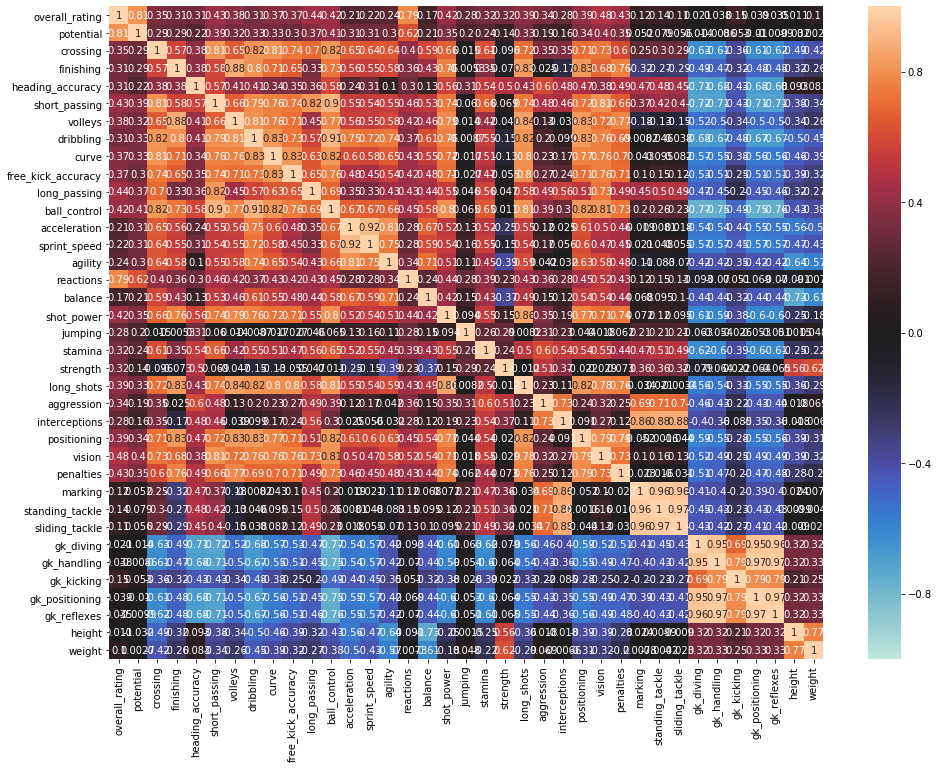

In [465]:
player_atr_corr
fig,ax=plt.subplots(figsize=(16,12))
ax=sns.heatmap(player_atr_corr,vmin=-1,vmax=1,center=0,annot=True)
plt.show()
# ax.set_title('Correlation Heatmap of Player attributes',size=16)

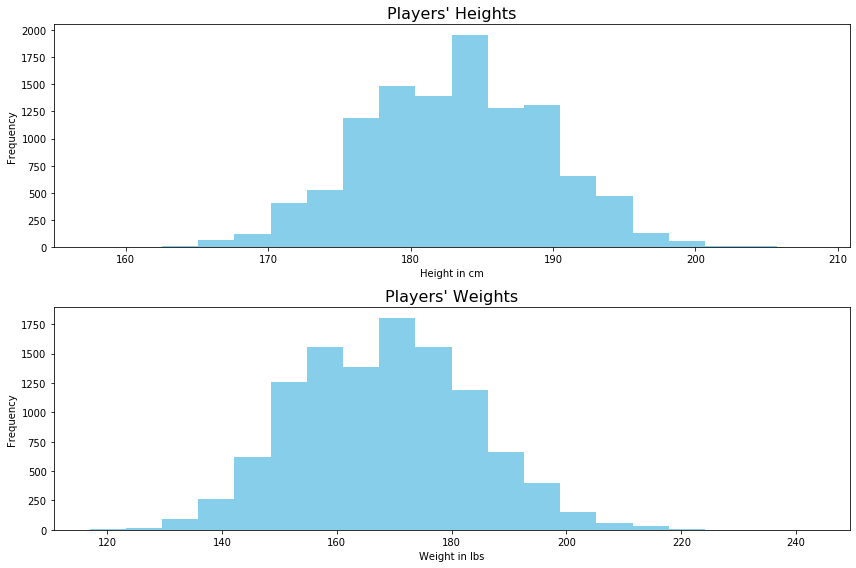

In [167]:
fig,axs=plt.subplots(2,1,figsize=(12,8))

axs[0].hist(player['height'],bins=20,color='skyblue')
axs[1].hist(player['weight'],bins=20,color='skyblue')
axs[0].set_title("Players' Heights",size=16)
axs[0].set_xlabel('Height in cm')
axs[0].set_ylabel('Frequency')
axs[1].set_title("Players' Weights",size=16)
axs[1].set_xlabel('Weight in lbs')
axs[1].set_ylabel('Frequency')

plt.tight_layout()

In [235]:
player_height_weight=player_avg[['height','weight']].groupby(['weight']).mean().reset_index()
player_height_rate=player_avg[['height','overall_rating']].groupby(['height']).mean().reset_index()
player_weight_rate=player_avg[['weight','overall_rating']].groupby(['weight']).mean().reset_index()
# player_height_rate

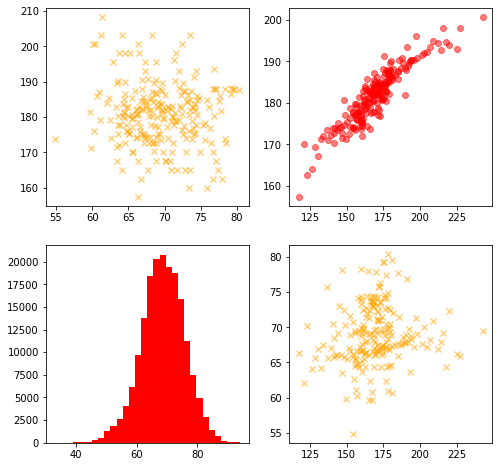

In [281]:
fig,axs=plt.subplots(2,2,figsize=(8,8))
# for i,ax in enumerate(axs.flatten()):
# axs[0,1]=sns.lmplot(x='height',y='weight',data=player)
axs[0,0].scatter(player_height_rate['overall_rating'],
                 player_height_rate['height']
                ,marker='x',alpha=0.5,c='orange')
axs[0,1].scatter(player_height_weight['weight'],
                 player_height_weight['height']
                ,marker='o',alpha=0.5,c='r')
axs[1,0].hist(player_info['overall_rating'],bins=30,color='r')
axs[1,1].scatter(player_weight_rate['weight'],
                 player_weight_rate['overall_rating']
                 ,marker='x',alpha=0.5,c='orange')
plt.show()

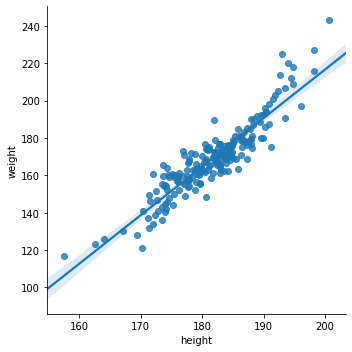

In [359]:
axs[0,1]=sns.lmplot(x='height',y='weight',data=player_height_weight)

**Now taking a look at betting odds**

Eg. England Premier League

In [396]:
epl=match[(match['league_id']==1729)]
epl['results']=np.where((epl['home_team_goal']-epl['away_team_goal'])>0,'H',
                        np.where((epl['home_team_goal']-epl['away_team_goal'])==0,'D','A'))
epl_bet=epl.drop(['id','country_id','league_id','match_api_id'],axis=1)
epl_bet.drop(epl.columns[11:85],axis=1,inplace=True)
epl_bet=epl_bet.reset_index().drop(['index'],axis=1)

team_name=team.set_index('team_api_id')['team_short_name'].to_dict()
epl_bet['Home']=epl_bet['home_team_api_id'].map(team_name)
epl_bet['Away']=epl_bet['away_team_api_id'].map(team_name)

epl_bet_col=epl_bet.columns
h=[]
d=[]
a=[]
for i,n in enumerate(epl_bet_col):
    if n.endswith('H'):
        h.append(n)
    elif n.endswith('A'):
        a.append(n)
    elif n.endswith('D'):
        d.append(n)
        
# print(h)
# print(a)
# print(d)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [402]:
epl_bet['max_Home_odds']=epl_bet[h].max(axis=1)
epl_bet['max_Away_odds']=epl_bet[a].max(axis=1)
epl_bet['max_Draw_odds']=epl_bet[d].max(axis=1)
# epl_bet['max_Home_odds']=h
# epl_bet['max_Away_odds']=a
# epl_bet['max_Draw_odds']=d

In [424]:
epl_bet.head(50)

season  stage                 date  home_team_api_id  away_team_api_id  \
0   2008/2009      1  2008-08-17 00:00:00             10260             10261   
1   2008/2009      1  2008-08-16 00:00:00              9825              8659   
2   2008/2009      1  2008-08-16 00:00:00              8472              8650   
3   2008/2009      1  2008-08-16 00:00:00              8654              8528   
4   2008/2009      1  2008-08-17 00:00:00             10252              8456   
5   2008/2009      1  2008-08-16 00:00:00              8668              8655   
6   2008/2009      1  2008-08-16 00:00:00              8549              8586   
7   2008/2009      1  2008-08-16 00:00:00              8559             10194   
8   2008/2009      1  2008-08-16 00:00:00              8667              9879   
9   2008/2009      1  2008-08-17 00:00:00              8455              8462   
10  2008/2009     10  2008-10-29 00:00:00             10260              8654   
11  2008/2009     10  2008-10-29 00:00:00              9825              8586   
12  2008/2009     10  2008-10-29 00:00:00              8549              8456   
13  2008/2009     10  2008-10-29 00:00:00              8559              8668   
14  2008/2009     10  2008-10-29 00:00:00              8667              8455   
15  2008/2009     10  2008-10-29 00:00:00             10194              8472   
16  2008/2009     10  2008-10-29 00:00:00              8650              8462   
17  2008/2009     10  2008-10-29 00:00:00             10252              8655   
18  2008/2009     10  2008-10-28 00:00:00             10261              8659   
19  2008/2009     10  2008-10-29 00:00:00              9879              8528   
20  2008/2009     11  2008-11-01 00:00:00             10260              8667   
21  2008/2009     11  2008-11-01 00:00:00              8586              8650   
22  2008/2009     11  2008-11-01 00:00:00              8668              9879   
23  2008/2009     11  2008-11-01 00:00:00              8549              8654   
24  2008/2009     11  2008-11-03 00:00:00             10261             10252   
25  2008/2009     11  2008-11-02 00:00:00              8559              8456   
26  2008/2009     11  2008-11-01 00:00:00              8659              8655   
27  2008/2009     11  2008-11-01 00:00:00              8462              8528   
28  2008/2009     11  2008-11-01 00:00:00             10194              9825   
29  2008/2009     11  2008-11-01 00:00:00              8455              8472   
30  2008/2009     12  2008-11-08 00:00:00              9825             10260   
31  2008/2009     12  2008-11-08 00:00:00              8650              8659   
32  2008/2009     12  2008-11-08 00:00:00              8472              8462   
33  2008/2009     12  2008-11-08 00:00:00              8654              8668   
34  2008/2009     12  2008-11-09 00:00:00             10252              8549   
35  2008/2009     12  2008-11-09 00:00:00              8456              8586   
36  2008/2009     12  2008-11-09 00:00:00              8655              8455   
37  2008/2009     12  2008-11-09 00:00:00              9879             10261   
38  2008/2009     12  2008-11-08 00:00:00              8667              8559   
39  2008/2009     12  2008-11-08 00:00:00              8528             10194   
40  2008/2009     13  2008-11-15 00:00:00             10260             10194   
41  2008/2009     13  2008-11-15 00:00:00              9825             10252   
42  2008/2009     13  2008-11-15 00:00:00              8654              8462   
43  2008/2009     13  2008-11-16 00:00:00              8668              8549   
44  2008/2009     13  2008-11-15 00:00:00             10261              8528   
45  2008/2009     13  2008-11-15 00:00:00              8655              8472   
46  2008/2009     13  2008-11-15 00:00:00              9879              8586   
47  2008/2009     13  2008-11-15 00:00:00              8559              8650   
48  2008/2009     13  2008-11-15 00:00

In [407]:
epl_bet['you_bet']=100/epl_bet['max_Home_odds']+100/epl_bet['max_Away_odds']+100/epl_bet['max_Draw_odds']

**Hedge**

If you bet $100 on the max odds of all three match results, on every match, how much will you make at the end?

In [423]:
print('You will make {0:.0f} dollars.'.format(sum(100-epl_bet['you_bet'])))

You will make -4715 dollars.


In [433]:
epl_bet.groupby(['Home']).unique()

AttributeError: 'DataFrameGroupBy' object has no attribute 'unique'

**Starting From England Premier League**

In [80]:
df=match[(match['league_id']==1729)]
# drop=df.iloc[:,11:77]
# df.drop(drop,axis=1,inplace=True)
# df.drop(df.columns[0:7],axis=1,inplace=True)

In [84]:
df.head()

id  country_id  league_id     season  stage                 date  \
1728  1729        1729       1729  2008/2009      1  2008-08-17 00:00:00   
1729  1730        1729       1729  2008/2009      1  2008-08-16 00:00:00   
1730  1731        1729       1729  2008/2009      1  2008-08-16 00:00:00   
1731  1732        1729       1729  2008/2009      1  2008-08-16 00:00:00   
1732  1733        1729       1729  2008/2009      1  2008-08-17 00:00:00   

      match_api_id  home_team_api_id  away_team_api_id  home_team_goal  \
1728        489042             10260             10261               1   
1729        489043              9825              8659               1   
1730        489044              8472              8650               0   
1731        489045              8654              8528               2   
1732        489046             10252              8456               4   

      away_team_goal  home_player_X1  home_player_X2  home_player_X3  \
1728               1             1.0             2.0             4.0   
1729               0             1.0             2.0             4.0   
1730               1             1.0             2.0             4.0   
1731               1             1.0             2.0             4.0   
1732               2             1.0             2.0             4.0   

      home_player_X4  home_player_X5  home_player_X6  home_player_X7  \
1728             6.0             8.0             2.0             4.0   
1729             6.0             8.0             2.0             4.0   
1730             6.0             8.0             2.0             4.0   
1731             6.0             8.0             2.0             4.0   
1732             6.0             8.0             2.0             4.0   

      home_player_X8  home_player_X9  home_player_X10  home_player_X11  \
1728             6.0             8.0              4.0              6.0   
1729             6.0             8.0              4.0              6.0   
1730             6.0             8.0              4.0              6.0   
1731             6.0             8.0              4.0              6.0   
1732             6.0             8.0              4.0              6.0   

      away_player_X1  away_player_X2  away_player_X3  away_player_X4  \
1728             1.0             2.0             4.0             6.0   
1729             1.0             2.0             4.0             6.0   
1730             1.0             2.0             4.0             6.0   
1731             1.0             2.0             6.0             8.0   
1732             1.0             2.0             4.0             6.0   

      away_player_X5  away_player_X6  away_player_X7  away_player_X8  \
1728             8.0             2.0             4.0             6.0   
1729             8.0             5.0             7.0             9.0   
1730             8.0             2.0             4.0             6.0   
1731             4.0             2.0             4.0             6.0   
1732             8.0             1.0             3.0             5.0   

      away_player_X9  away_player_X10  away_player_X11  home_player_Y1  \
1728             8.0              5.0              5.0             1.0   
1729             1.0              3.0              5.0             1.0   
1730             8.0              4.0              6.0             1.0   
1731             8.0              4.0              6.0             1.0   
1732             7.0              9.0              5.0             1.0   

      home_player_Y2  home_player_Y3  home_player_Y4  home_player_Y5  \
1728             3.0             3.0             3.0             3.0   
1729             3.0             3.0             3.0             3.0   
1730             3.0             3.0             3.0             3.0   
1731             3.0             3.0             3.0             3.0   
1732             3.0             3.0             3.0             3.0   

      home_player_Y6  home_player_Y7  home_player_Y

In [230]:
t_avg=t_atr.groupby(['team_api_id']).mean()
# t_avg.describe()
t_avg

id  team_fifa_api_id  buildUpPlaySpeed  buildUpPlayDribbling  \
team_api_id                                                                     
1601         1115.5             874.0         47.333333                  48.0   
1773          942.0          100087.0         52.000000                  51.0   
1957          621.5          110745.0         47.166667                  54.0   
2033          930.0          111540.0         49.000000                  62.0   
2182          697.5             873.0         60.333333                  52.5   
2183          999.5            1570.0         32.750000                   NaN   
2186          333.0          110747.0         41.400000                  50.0   
4087          413.0          111271.0         52.000000                  43.0   
4170          223.0          111376.0         48.000000                   NaN   
6269          912.5          112225.0         60.000000                  57.0   
6351          404.0            2013.0         50.000000                   NaN   
6391          509.5          110316.0         54.500000                  53.0   
6403          946.5            1892.0         44.833333                  40.0   
6413          977.0            1914.0         49.666667                  38.0   
6421          719.0           10018.0         30.000000                   NaN   
6433          520.5          100632.0         56.500000                  42.5   
6493          159.5            1714.0         43.500000                   NaN   
6547          979.0          100741.0         54.000000                  54.0   
6631          426.0          100626.0         39.000000                  33.0   
7730          673.5            1862.0         38.750000                  55.0   
7788          267.5             647.0         44.000000                  37.5   
7794         1139.0              58.0         53.600000                  61.0   
7819          257.5             210.0         58.333333                  50.0   
7841         1085.5             744.0         47.333333                  47.0   
7842          402.0           10020.0         63.666667                  56.0   
7844         1350.5            1887.0         42.500000                  52.0   
7869          327.5            1867.0         40.333333                  46.5   
7878          527.0          110832.0         52.400000                  56.0   
7943         1133.5          111974.0         50.166667                  68.0   
7955         1428.0             435.0         54.333333                   NaN   
...             ...               ...               ...                   ...   
10211         154.0            1897.0         42.000000                   NaN   
10212         815.5            1893.0         44.000000                  49.0   
10214         870.5            1891.0         46.666667                  59.0   
10215          24.5            1901.0         42.500000                  53.0   
10217          30.5             650.0         45.500000                  43.5   
10218         417.0            1971.0         57.666667                  41.0   
10219        1090.5            1905.0         45.250000                  30.0   
10228        1144.5            1913.0         50.833333                  44.0   
10229         115.5            1906.0         51.666667                  42.0   
10233         493.5          110556.0         62.833333                  52.0   
10235         454.5             246.0         43.833333                  36.5   
10238        1356.5             665.0         51.000000                  49.0   
10242        1290.0             294.0         46.200000                  48.0   
10243         448.5             894.0         56.833333                  49.0   
10249         847.5              70.0         49.166667                  50.5   
10251         588.0              81.0         57.600000                  49.0   
10252          79.5               2.0         65

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 4388 to 4767
Data columns (total 4 columns):
home_team_api_id    380 non-null int64
away_team_api_id    380 non-null int64
home_team_goal      380 non-null int64
away_team_goal      380 non-null int64
dtypes: int64(4)
memory usage: 14.8 KB


In [173]:
df.sort_values(by='home_team_api_id').head(50)

home_team_api_id  away_team_api_id  home_team_goal  away_team_goal
4621              8197             10261               1               0
4721              8197             10252               3               2
4461              8197              8455               2               1
4738              8197              9825               2               5
4491              8197              8456               0               0
4421              8197              9817               2               1
4691              8197              8668               3               1
4511              8197              8678               0               0
4541              8197             10194               3               0
4671              8197             10003               4               0
4549              8197              8650               2               0
4662              8197              8654               2               2
4401              8197              9826               1               0
4441              8197             10260               1               1
4611              8197              8586               1               1
4392              8197              8472               4               2
4578              8197              9850               1               0
4641              8197              8466               1               0
4591              8197              8659               2               2
4530              8455              8668               3               3
4480              8455              9817               2               2
4699              8455              8197               1               1
4469              8455              8472               3               1
4598              8455             10194               1               1
4522              8455              8659               2               2
4390              8455             10003               2               2
4679              8455              8586               2               2
4428              8455              9850               1               0
4628              8455              8654               2               2
4449              8455              8678               0               1
4758              8455             10252               2               0
4408              8455              8650               1               3
4660              8455              8456               0               3
4560              8455             10260               1               1
4751              8455              8466               1               3
4730              8455              9825               2               0
4571              8455             10261               5               1
4710              8455              9826               1               2
4463              8456             10003               2               1
4712              8456              9817               2               0
4574              8456              8586               1               2
4601              8456             10252               4               0
4501              8456              8455               3               0
4631              8456             10260               0               1
4651              8456              8659               2               1
4523              8456              8668               0               0
4532              8456              9826               4               0
4443              8456              8466               3               1
4562              8456              8197               1               3
4482              8456              8472               4               1

In [240]:
df['result']=df['home_team_goal']-df['away_team_goal']
df['win']=np.where(df['result']>0,'H',np.where(df['result']<0,'A','D'))
df['score']=np.where(df['result']>0,3,np.where(df['result']<0,0,1))
df.merge(t[['team_api_id','team_short_name']],left_on='home_team_api_id',right_on='team_api_id').drop('team_api_id',axis=1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
0                9825              8654               0               2   
1                9825              8668               2               1   
2                9825              8586               1               1   
3                9825              8472               3               1   
4                9825              8456               2               1   
5                9825              8678               2               0   
6                9825             10261               1               0   
7                9825              8455               0               1   
8                9825              8466               0               0   
9                9825              8197               2               1   
10               9825             10003               1               2   
11               9825              8650               0               0   
12               9825              8659               2               0   
13               9825              9817               4               0   
14               9825              9826               1               1   
15               9825              9850               1               0   
16               9825             10252               4               0   
17               9825             10194               2               0   
18               9825             10260               3               0   
19               8678             10252               0               1   
20               8678              8586               1               5   
21               8678             10261               0               1   
22               8678              8668               3               3   
23               8678             10260               2               1   
24               8678              9826               0               0   
25               8678              8654               1               3   
26               8678              9850               3               0   
27               8678              9825               0               2   
28               8678             10194               1               3   
29               8678              8466               2               0   
..                ...               ...             ...             ...   
350              8586              9817               1               0   
351              8586             10003               2               1   
352              8586              9825               2               2   
353              8586              8678               3               0   
354              8586             10260               3               0   
355              8586              8659               1               1   
356              8586              8466               1               2   
357              8586              8668               0               0   
358              8586              9826               1               0   
359              8586              8456               4               1   
360              8586              8650               0               0   
361              9817              8654               2               0   
362              9817             10260               1               2   
363              9817              9850               2               0   
364              9817              8650               3               0   
365              9817              8586               1               2   
366              9817              8659               0               0   
367              9817              8456               1               2   
368              9817             10261               2               1   
369              9817              8455               0               0   
370              9817              8678               0               0   
371              9817         

In [243]:
df['team_short_name']#,'score']].groupby(df['team_short_name']).sum()

KeyError: 'team_short_name'

In [229]:
from sklearn.model_selection import train_test_split 

In [ ]:
X=t_

KeyError: 'team_short_name'

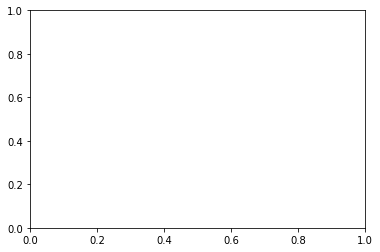

In [244]:
fig,ax=plt.subplots()
ax.plot(df['win'],df['team_short_name'])